<a href="https://colab.research.google.com/github/IngridRodrigues15/study_bike_sharing/blob/main/MachineLearningFoundation_Atividade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 

In [ ]:
hour = pd.read_csv("/content/hour.csv")

In [ ]:
day = pd.read_csv("/content/day.csv")

In [ ]:
hour.head

<bound method NDFrame.head of        instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0            1  2011-01-01       1   0  ...     0.0000       3          13   16
1            2  2011-01-01       1   0  ...     0.0000       8          32   40
2            3  2011-01-01       1   0  ...     0.0000       5          27   32
3            4  2011-01-01       1   0  ...     0.0000       3          10   13
4            5  2011-01-01       1   0  ...     0.0000       0           1    1
...        ...         ...     ...  ..  ...        ...     ...         ...  ...
17374    17375  2012-12-31       1   1  ...     0.1642      11         108  119
17375    17376  2012-12-31       1   1  ...     0.1642       8          81   89
17376    17377  2012-12-31       1   1  ...     0.1642       7          83   90
17377    17378  2012-12-31       1   1  ...     0.1343      13          48   61
17378    17379  2012-12-31       1   1  ...     0.1343      12          37   49

[17379 ro

In [ ]:
day.head

<bound method NDFrame.head of      instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0          1  2011-01-01       1   0  ...   0.160446     331         654   985
1          2  2011-01-02       1   0  ...   0.248539     131         670   801
2          3  2011-01-03       1   0  ...   0.248309     120        1229  1349
3          4  2011-01-04       1   0  ...   0.160296     108        1454  1562
4          5  2011-01-05       1   0  ...   0.186900      82        1518  1600
..       ...         ...     ...  ..  ...        ...     ...         ...   ...
726      727  2012-12-27       1   1  ...   0.350133     247        1867  2114
727      728  2012-12-28       1   1  ...   0.155471     644        2451  3095
728      729  2012-12-29       1   1  ...   0.124383     159        1182  1341
729      730  2012-12-30       1   1  ...   0.350754     364        1432  1796
730      731  2012-12-31       1   1  ...   0.154846     439        2290  2729

[731 rows x 16 column

Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

### Qual o dia da semana com mais demanda por bicicletas?

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64


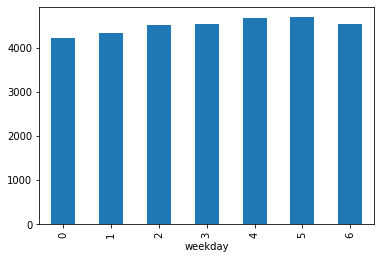

In [ ]:
day.groupby(['weekday'])['cnt'].mean().plot.bar()
# day.groupby(['weekday'])['cnt'].sum()
print(day.groupby(['weekday'])['cnt'].mean())

Legenda:


*  0: DOM
*  1: SEG
*  2: TER
*  3: QUA
*  4: QUI
*  5: SEX
*  6: SÁB

Os dias com maior demanda por bicicletas são : 

*  5: SEX





### Qual a influência dos feriados na demanda por bicicletas?

In [ ]:

dias_uteis = day.query('holiday == "0"')
dias_feriados = day.query('holiday == "1"')

Total_dias_uteis = sum(dias_uteis['cnt'])
print(Total_dias_uteis)

Total_dias_feriados = sum(dias_feriados['cnt'])
print(Total_dias_feriados)

3214244
78435


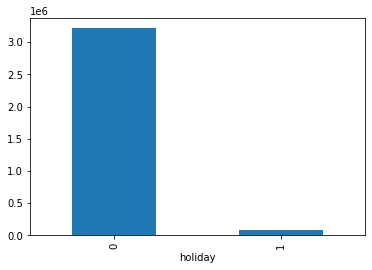

In [ ]:

day.groupby(['holiday'])['cnt'].agg('sum').plot.bar()



Aqui podemos analisar que a demanda por bicicletas é maior em dias comuns do que em feriados



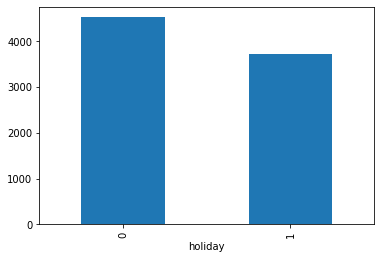

In [ ]:

day.groupby(['holiday'])['cnt'].agg('mean').plot.bar()


Comparar o dia da semana do feriado com a media dos outros dias 

In [ ]:
day.groupby(['holiday','weekday'])['cnt'].agg('mean')


holiday  weekday
0        0          4228.828571
         1          4398.866667
         2          4544.621359
         3          4520.825243
         4          4720.343137
         5          4718.588235
         6          4550.542857
1        1          3973.666667
         2          1013.000000
         3          7403.000000
         4          1960.000000
         5          3247.000000
Name: cnt, dtype: float64

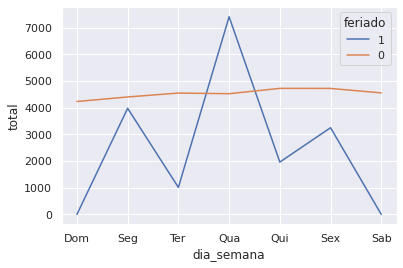

In [ ]:

dia_util = day.groupby(['holiday','weekday'])['cnt'].agg('mean')[0]
# Dias uteis 
data_dias_uteis = {
'feriado': ['0', '0', '0', '0', '0','0','0'],
'dia_semana': ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab'],
'total': [4228.828571, 4398.866667,4544.621359, 4520.825243,4720.343137,4718.588235,4550.542857]
}

df_dias_uteis = pd.DataFrame(data_dias_uteis, columns=['feriado','dia_semana','total'])

#Feriado 
feriado = day.groupby(['holiday','weekday'])['cnt'].agg('mean')[1]
data_feriado = {
'feriado': ['1', '1', '1', '1', '1','1','1'],
'dia_semana': ['Dom','Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab'],
'total': [0, 3973.666667,1013.000000,7403.000000,1960.000000,3247.000000, 0]
}

df_feriado = pd.DataFrame(data_feriado, columns=['feriado','dia_semana','total'])
df_feriado.head()


df = pd.concat([df_feriado, df_dias_uteis])

import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="dia_semana", y="total",
             hue="feriado",
             data=df)

###  Qual a estação do ano com mais demanda por bicicletas?

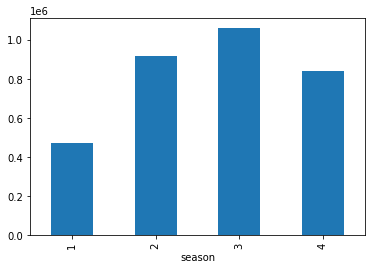

In [ ]:
day.groupby(['season'])['cnt'].agg('sum').plot.bar()


A estação com maior demanda de alguel de bicicletas foi : 

*   3:Outono
*   2:Verão
*   4:Inverno
*   1:Primavera


### Qual o turno do dia (manhã, tarde ou noite) com mais demanda por bicicletas?

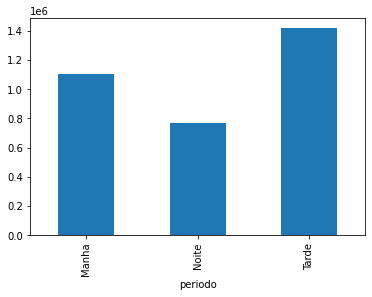

In [ ]:
manha = [5,6,7,8,9,10,11,12]
tarde = [13,14,15,16,17,18]
noite = [19,20,21,22,23,24,0,1,2,3,4]

def periodo(hora):
  if hora in manha:
    return "Manha"
  elif hora in tarde:
    return "Tarde"
  else:
    return "Noite"

hour['periodo'] = hour.apply(lambda x: periodo(x['hr']), axis=1)


hour.groupby(['periodo'])['cnt'].agg('sum').plot.bar()


### Qual a influência do clima na demanda por bicicletas?

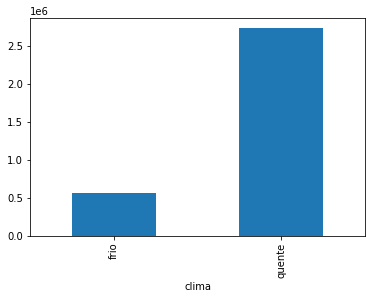

In [ ]:


def clima(temp):
  temperatura_real = temp * 41
  if temperatura_real < 15:
    return "frio"
  else:
    return "quente"

hour['clima'] = hour.apply(lambda x: clima(x['temp']), axis=1)


hour.groupby(['clima'])['cnt'].agg('sum').plot.bar();
